# 과제3. 직원 이직 분석

* 여러분은 OO회사의 **데이터분석가** 입니다.
* **인사팀**에서는 여러분에게 우리 회사 직원의 **이직(Attrition)에 영향을 주는 요인**을 분석해달라고 요청해 왔습니다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [6]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data.drop(['EducationField', 'Education','JobInvolvement', 'StockOptionLevel', 'BusinessTravel','YearsWithCurrManager'
,'YearsInCurrentRole','JobRole', 'Department','EmployeeNumber','EnvironmentSatisfaction','TrainingTimesLastYear','YearsAtCompany']
          , axis = 1, inplace = True)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.head(10)

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance
0,0,33,7.0,Male,3,Married,11691,0.0,No,11,4,14,4
1,0,35,18.0,Male,4,Single,9362,2.0,No,11,3,10,3
2,0,42,6.0,Male,1,Married,13348,9.0,No,13,2,18,4
3,0,46,2.0,Female,1,Married,17048,8.0,No,23,1,28,3
4,0,39,NaN,Male,4,Divorced,4127,2.0,No,18,4,7,3
5,1,22,4.0,Male,3,Single,3894,5.0,No,16,3,4,3
6,0,24,21.0,Male,1,Divorced,2296,0.0,No,14,2,2,3
7,0,34,8.0,Male,3,Married,4404,2.0,No,12,1,6,4
8,0,30,20.0,Male,1,Married,9957,0.0,No,15,3,7,2
9,0,26,6.0,Female,4,Married,2659,1.0,Yes,13,3,3,3


|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, Yes , No	|	범주	| 1- 이직, 0- 잔류		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	NumCompaniesWorked	|	입사 전 근무한 회사 수	|	숫자	|	0 - 우리회사가 첫 직장	|
|	feature	|	RelationshipSatisfaction	|	동료와의 관계	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High		|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	범주	|	1 Bad, 2 Good, 3 Better, 4 Best	|

* 분석 단위 : 직원 한사람, 한사람...
* 설명에서 언급되어지지 않은 사항은 직접 고민하며 스스로 정해서 진행하시면 됩니다.^^
* 자\~! 이제 시작해 봅시다\~!

----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 3개 이상씩, 전체 6개 이상의 변수를 도출, 가설을 수립하시오.

* 가설1 : 집과 직장의 거리가 멀수록 직원들의 이직이 더 많이 일어날 것이다.

* 가설2 : 입사 전 근무한 회사 수가 많은 직원들은 그렇지 않은 직원들의 비해 이직이 더 많이 일어날 것이다.

* 가설3 : 총 경력 연수가 적은 직원일수록 이직이 더 많이 일어날 것이다.

* 가설4 : 직무 만족도를 낮게 평가한 직원일수록 이직할 확률이 높다.

* 가설5 : 동료와의 관계를 부정적으로 평가한 직원일수록 이직할 확률이 높다.

* 가설6 : 야근을 하는 직원이 그렇지 않은 직원들의 비해 이직이 더 많이 일어날 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) target

In [7]:
target = 'Attrition'

① 변수의 비즈니스 의미  
* 이직 여부 Yes / No => 1 - 이직 / 0 - 잔류

② 숫자, 범주?  
* 범주 데이터

③ NaN 존재 유무

In [8]:
data[target].isna().sum()

0

④ 기초통계량(수치화)

In [9]:
print(data[target].value_counts())
print(data[target].value_counts()/ len(data[target]))

0    1050
1     200
Name: Attrition, dtype: int64
0    0.84
1    0.16
Name: Attrition, dtype: float64


⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


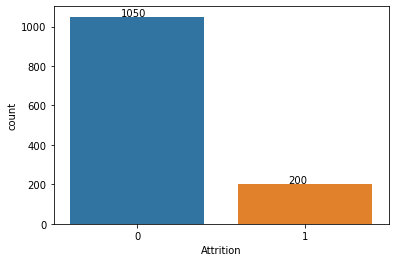

In [10]:
cnt = data[target].value_counts()
sns.countplot(data[target]) #plt의 barplot 사용해서
plt.text(-0.1, cnt.values[0]+5, cnt.values[0])
plt.text(0.9, cnt.values[1]+5, cnt.values[1])

plt.show()

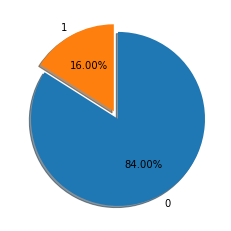

In [11]:
cnt = data[target].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05], shadow=True)
plt.show()

- 총 1250명 중 이직하지 않은 직원 1050명 이직한 직원 200명

### 2) feature1

In [12]:
feature = 'DistanceFromHome'

① 변수의 비즈니스 의미
* 집-직장 거리 (단위 : 마일)

② 숫자, 범주?
* 숫자 데이터

③ NaN 존재 유무

In [13]:
data[feature].isna().sum()

54

> * NaN 4.3% 존재

④ 기초통계량(수치화)

In [14]:
data[feature].describe()

count    1196.000000
mean        9.258361
std         8.166016
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

⑤ NaN 처리  
* 결정 : 평균값 처리  
* 이유 : 행 제거를 하기에는 1250명의 데이터 중 5%에 가까운 54명의 데이터는 분석하는데 유의미한 결과를 일으킬 수 있다.  
* 대책 : 결측치를 제출한 직원들 중 현재 회사에 근무하고 있는 직원들은 다시 조사를 하고 이직한 직원들은 평균값을 기입한다.

⑥ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

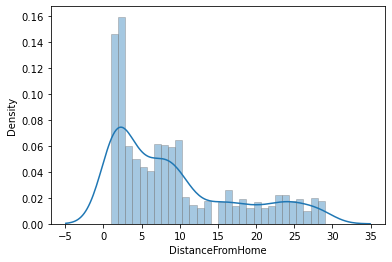

In [15]:
sns.distplot(data[feature], bins = 30, hist_kws = dict(edgecolor = 'grey'))

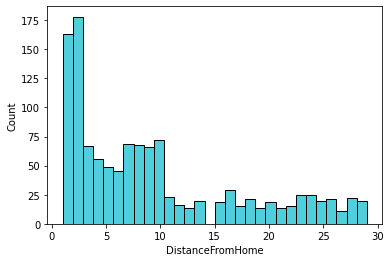

In [16]:
sns.histplot(data[feature], bins = 30, color = '#17becf')
plt.show()

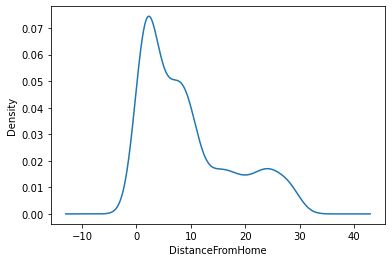

In [17]:
pd.Series(feature)
data[feature].plot(kind = 'kde') 
plt.xlabel('DistanceFromHome')
plt.show()

⑦ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 직원들의 75%가 14마일 이내에 거주하고 있다.
> * 가장 먼 지역에 거주하는 직원의 직장과 집의 거리는 29마일이다.
> * 직장과의 거리가 먼 25%의 직원들의 이직여부와 그렇지 않은 직원들의 이직여부를 비교해 볼 필요가 있다.

### 3) feature2

In [18]:
feature = 'NumCompaniesWorked'

① 변수의 비즈니스 의미  
* 입사 전 근무한 회사 수

② 숫자, 범주?  
* 숫자 데이터

③ NaN 존재 유무

In [19]:
data[feature].isna().sum()

21

④ 기초통계량(수치화)

In [20]:
data[feature].describe()

count    1229.000000
mean        2.678600
std         2.473647
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

⑤ NaN 처리  
*  결정 : 행 제거
*  이유 : 입사 전 근무한 회사 수는 최대값과 최소값의 차이가 크지 않고 연속적인 값이 아닌 정수의 형식으로 평균값으로 처리하기에는 오류를 크게 범할 수 있다. 
*  대책 : 결측치를 제출한 직원들 중 현재 회사에 근무하고 있는 직원들은 다시 조사를 하고 이직한 직원들의 행은 제거한다.

⑥ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

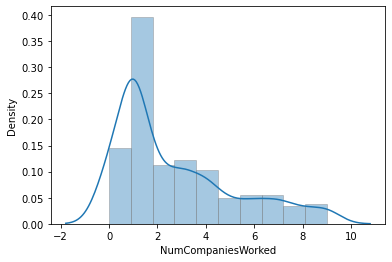

In [21]:
sns.distplot(data[feature], bins = 10, hist_kws = dict(edgecolor = 'grey'))

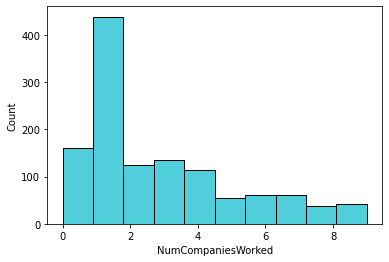

In [22]:
sns.histplot(data[feature], bins = 10, color = '#17becf')
plt.show()

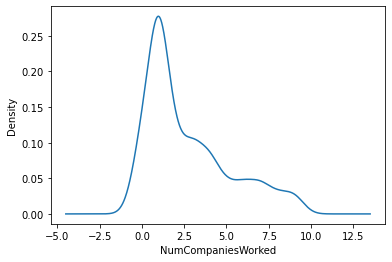

In [23]:
pd.Series(feature)
data[feature].plot(kind = 'kde') 
plt.xlabel('NumCompaniesWorked')
plt.show()

⑦ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 최대값은 9이고 최소값은 0이다.
> * 이직 회수가 많은 직원일 수록 회사를 자주 옮긴다는 것으로 간주하고 이직 회수가 많은 직원들의 현재 이직여부를 검토해볼 필요가 있다.

⑧ 추가 분석해 볼 사항이 있나요?
> * 이직 회수가 적은 직원일 수록 자신에게 맞는 회사를 찾기 위해 이직할 확률도 크다고 생각되기 때문에 이직 회수가 적은 직원들의 현재 이직 여부 또한 검토해볼 필요가 있다.

### 4) feature3

In [24]:
feature = 'TotalWorkingYears'

① 변수의 비즈니스 의미

* 총 경력 연수

② 숫자, 범주?

* 숫자 데이터

③ NaN 존재 유무

In [25]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [26]:
data[feature].describe()

count    1250.00000
mean       11.33920
std         7.79687
min         0.00000
25%         6.00000
50%        10.00000
75%        15.00000
max        40.00000
Name: TotalWorkingYears, dtype: float64

⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

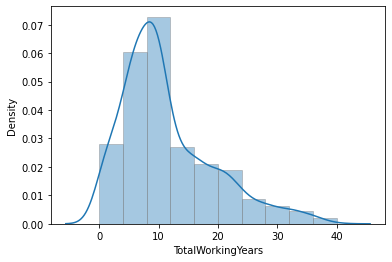

In [27]:
sns.distplot(data[feature], bins = 10, hist_kws = dict(edgecolor = 'grey'))

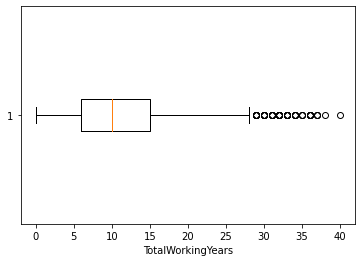

[6. 0.]
[15. 28.]


In [28]:
box = plt.boxplot(data[feature], vert = False)
plt.xlabel('TotalWorkingYears')
plt.show()

print(box['whiskers'][0].get_xdata())

print(box['whiskers'][1].get_xdata())

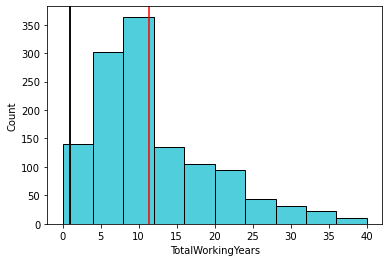

In [29]:
sns.histplot(data[feature], bins = 10, color = '#17becf')

plt.axvline(data[feature].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='black')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='black')
plt.show()

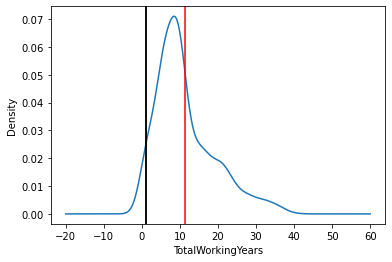

In [30]:
pd.Series(feature)
data[feature].plot(kind = 'kde')
plt.xlabel('TotalWorkingYears')
plt.axvline(data[feature].mean(), color='r')
plt.axvline(box['whiskers'][0].get_ydata()[0], color='black')
plt.axvline(box['whiskers'][1].get_ydata()[0], color='black')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 총 경력 연수가 28년 이상에서 이상치가 발생하여 이상치에 대한 대책이 필요하다.
> * 총 경력 연수의 최대값은 40년이고 최소값은 0년이다.
> * 총 경력 연수가 높은 직원들은 회사의 문화, 환경 등에 잘 적응하여 이직할 확률을 낮을 것이라고 예상한다.

### 5) feature4

In [31]:
feature = 'JobSatisfaction'

① 변수의 비즈니스 의미  
* 직무 만족도 (1 Low, 2 Medium, 3 High, 4 Very High)

② 숫자, 범주?
* 범주 데이터

③ NaN 존재 유무

In [32]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [33]:
print(data[feature].value_counts())
print(data[feature].value_counts()/ len(data[feature]))

4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64
4    0.3176
3    0.2944
1    0.2000
2    0.1880
Name: JobSatisfaction, dtype: float64


⑤ 분포 확인(시각화)

[397 368 250 235]    Int64Index([4, 3, 1, 2], dtype='int64')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


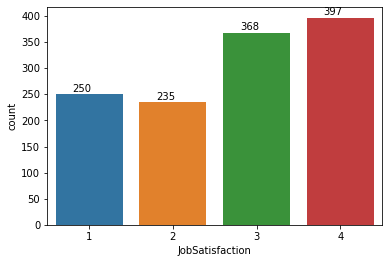

In [34]:
cnt = data[feature].value_counts()
print(cnt.values,'  ',cnt.index)
sns.countplot(data[feature])
plt.text(2.8, cnt.values[0]+5, cnt.values[0])
plt.text(1.8, cnt.values[1]+5, cnt.values[1])
plt.text(-0.2, cnt.values[2]+5, cnt.values[2])
plt.text(0.8, cnt.values[3]+5, cnt.values[3])

plt.show()

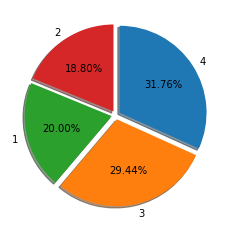

In [35]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()


⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 직무 만족도 평가에 부정적인(1.Low) 평가를 한 직원이 전체의 20% (250명)의 수치로 긍정적인 평가를 한 직원에 비해 적은 편이긴 하지만 20% 라는 수치는 적은 편이라고는 할 수 없다.
> * 직무 만족도를 위해 회사 내규에 따라 직무 변경 등 직원들의 편의를 보장해 줄 필요가 있다.
> * 부정적인 평가를 한 직원들의 이직 여부와 긍정적인 평가를 한 직원들의 이직 여부를 비교 분석해 볼 필요가 있다.

### 6) feature5

In [36]:
feature = 'RelationshipSatisfaction'

① 변수의 비즈니스 의미

동료와의 관계 (1 Low, 2 Medium, 3 High, 4 Very High)


② 숫자, 범주?

범주 데이터

③ NaN 존재 유무

In [37]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [38]:
print(data[feature].value_counts())
print(data[feature].value_counts()/ len(data[feature]))

3    397
4    365
2    258
1    230
Name: RelationshipSatisfaction, dtype: int64
3    0.3176
4    0.2920
2    0.2064
1    0.1840
Name: RelationshipSatisfaction, dtype: float64


⑤ 분포 확인(시각화)

[397 365 258 230]    Int64Index([3, 4, 2, 1], dtype='int64')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


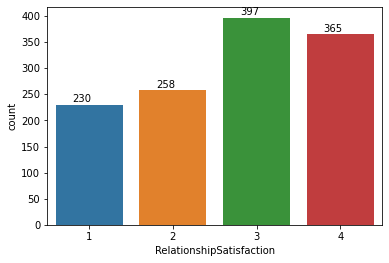

In [39]:
cnt = data[feature].value_counts()
print(cnt.values,'  ',cnt.index)
sns.countplot(data[feature])

plt.text(1.8, cnt.values[0]+5, cnt.values[0])
plt.text(2.8, cnt.values[1]+5, cnt.values[1])
plt.text(0.8, cnt.values[2]+5, cnt.values[2])
plt.text(-0.2, cnt.values[3]+5, cnt.values[3])

plt.show()

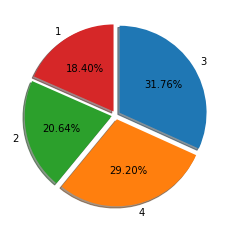

In [40]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 동료와의 관계에 부정적인(1.Low) 평가를 한 직원이 18.4%(230명)의 수치로 긍정적인 평가를 한 직원에 비해 적은편이긴 하지만 간과할만큼 적은 수치라고 생각하면 안될 것이다.
> * 동료와의 관계를 위해 회사 내에 커뮤니티 라운지처럼 회사 동료들 간의 커뮤니케이션을 할 수 있는 장소 설치를 고려해 볼 필요가 있다.
> * 부정적인 평가를 한 직원들의 이직 여부를 분석해 볼 필요가 있다,

### 7) feature6

In [41]:
feature = 'OverTime'

① 변수의 비즈니스 의미

야근여부 (Yes, No)

② 숫자, 범주?

범주 데이터

③ NaN 존재 유무

In [42]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [43]:
print(data[feature].value_counts())
print(data[feature].value_counts()/ len(data[feature]))

No     896
Yes    354
Name: OverTime, dtype: int64
No     0.7168
Yes    0.2832
Name: OverTime, dtype: float64


⑤ 분포 확인(시각화)

[896 354]    Index(['No', 'Yes'], dtype='object')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


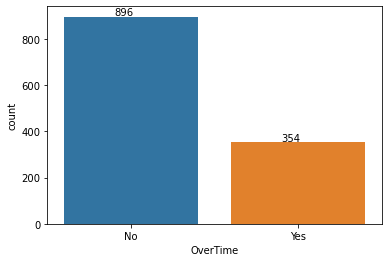

In [44]:
cnt = data[feature].value_counts()
print(cnt.values,'  ',cnt.index)
sns.countplot(data[feature])

plt.text(-0.1, cnt.values[0]+5, cnt.values[0])
plt.text(0.9, cnt.values[1]+5, cnt.values[1])

plt.show()

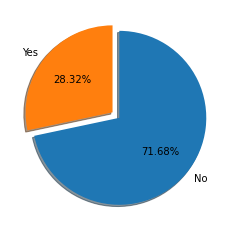

In [45]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05], shadow=True)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 야근은 업무에 있어서 필요할 수 있는 옵션이다.
> * 하지만 잦은 야근은 업무의 효율성을 저하시킬 수 있다.
> * 반드시 필요한 야근에는 합당한 보상이 필요하고 야근을 지양하는 회사라면 특정 시간 이후에 자동으로 컴퓨터의 전원이 꺼지는 등 시스템의 도입을 고려해 볼 필요가 있다.
> * 야근을 하는 직원들의 만족도를 분석해 볼 필요가 있다.

### 8) feature7

In [46]:
feature = 'PercentSalaryHike'

① 변수의 비즈니스 의미
> * 전년대비 급여인상율 (단위 : %)

② 숫자, 범주?

> * 숫자 데이터

③ NaN 존재 유무

In [47]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [48]:
data[feature].describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

⑤ 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

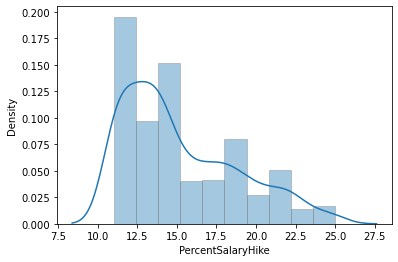

In [49]:
sns.distplot(data[feature], bins = 10, hist_kws = dict(edgecolor = 'grey'))

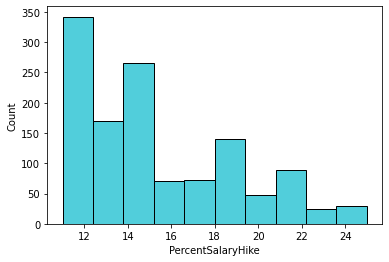

In [50]:
sns.histplot(data[feature], bins = 10, color = '#17becf')
plt.show()

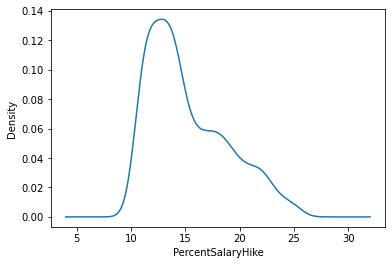

In [51]:
pd.Series(feature)
data[feature].plot(kind = 'kde') 
plt.xlabel('PercentSalaryHike')
plt.show()

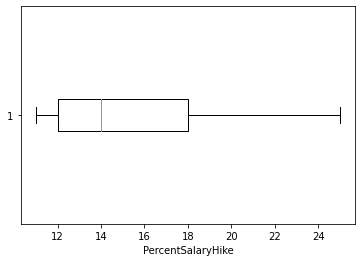

[12. 11.]
[18. 25.]


In [52]:
box = plt.boxplot(data[feature], vert = False)
plt.xlabel('PercentSalaryHike')
plt.show()

print(box['whiskers'][0].get_xdata())
print(box['whiskers'][1].get_xdata())

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

> * 전년대비 급여인상율의 최대값은 25% 이다.
> * 15% 를 기준으로 그 이상의 급여인상율을 받는 직원들의 수가 눈에 띄게 줄어든다.
> * 50% 의 직원들이 14% 이하의 급여인상율을 받고 있다.

### 9) feature8

In [53]:
feature = 'WorkLifeBalance'

① 변수의 비즈니스 의미
  * 동료와의 관계 (1 Low, 2 Medium, 3 High, 4 Very High)

② 숫자, 범주?
> * 범주 데이터

③ NaN 존재 유무

In [54]:
data[feature].isna().sum()

0

④ 기초통계량(수치화)

In [55]:
print(data[feature].value_counts())
print(data[feature].value_counts()/ len(data[feature]))

3    747
2    297
4    137
1     69
Name: WorkLifeBalance, dtype: int64
3    0.5976
2    0.2376
4    0.1096
1    0.0552
Name: WorkLifeBalance, dtype: float64


⑤ 분포 확인(시각화)

[747 297 137  69]    Int64Index([3, 2, 4, 1], dtype='int64')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


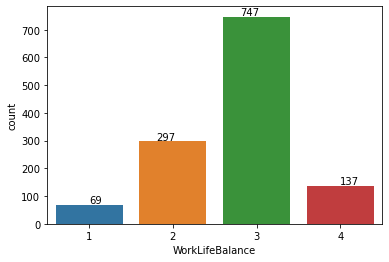

In [56]:
cnt = data[feature].value_counts()
print(cnt.values,'  ',cnt.index)
sns.countplot(data[feature])

plt.text(1.8, cnt.values[0]+5, cnt.values[0])
plt.text(0.8, cnt.values[1]+5, cnt.values[1])
plt.text(3, cnt.values[2]+5, cnt.values[2])
plt.text(0, cnt.values[3]+5, cnt.values[3])

plt.show()

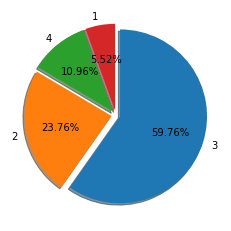

In [57]:
cnt = data[feature].value_counts()

plt.pie(cnt.values, labels = cnt.index, autopct = '%.2f%%', startangle=90, counterclock=False,
explode = [0.05, 0.05, 0.05, 0.05], shadow=True)
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.  
보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 워라밸을 긍정적으로 평가한 직원들이 94.48% 로 굉장히 많은 직원들이 긍정적으로 평가하였다.
> * 워라밸을 긍정적으로 평가한 직원들이 많은 만큼 회사의 복지 시스템이 잘 구축되어 있다고 판단할 수 있다.


## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

### (1) 범주형 Feature --> Target
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [58]:
# 전체 이탈율
total_mean = data[target].mean()
print(total_mean)

0.16


#### 1) feature --> target

In [59]:
feature = 'JobSatisfaction'

① 교차표(pd.crosstab())

In [60]:
pd.crosstab(data[target], data[feature])

JobSatisfaction,1,2,3,4
Attrition,,,,
0,197,196,308,349
1,53,39,60,48


② 시각화( Stacked Bar, Mosaic)

Attrition               0         1
JobSatisfaction                    
1                0.788000  0.212000
2                0.834043  0.165957
3                0.836957  0.163043
4                0.879093  0.120907


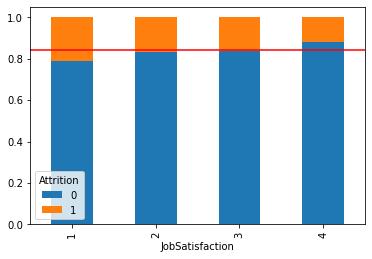

In [61]:
# 1) 집계
tmp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(tmp)
# 2) stacked bar!
tmp.plot.bar(stacked=True)

# 평균선 추가.
# 이직하지 않을 확률
plt.axhline(1-data[target].mean(), color = 'r')
plt.show()

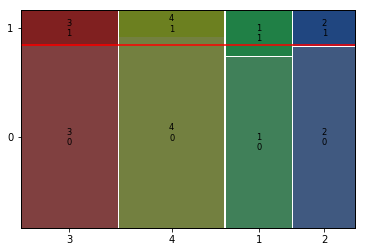

In [62]:

mosaic(data,[feature, target])

# 평균선 추가
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

> * 직무 만족도에서 부정적인 평가를 한 직원에서의 이직이 가장 많이 일어난다.

③ 가설검정(카이제곱검정)

In [63]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 JobSatisfaction    1    2    3    4
Attrition                          
0                197  196  308  349
1                 53   39   60   48
----------------------------------------------------------------------------------------------------
카이제곱통계량 9.63151465436614
p-value 0.021972649369306214
기대빈도
 [[210.   197.4  309.12 333.48]
 [ 40.    37.6   58.88  63.52]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * p-value가 0.02로 유의수준인 0.05보다는 작기 때문에 직무 만족도는 이직여부에 약한 영향을 미칠 수 있다.

#### 2) feature --> target

In [64]:
feature = 'RelationshipSatisfaction'

① 교차표(pd.crosstab())

In [65]:
pd.crosstab(data[target], data[feature])

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
0,183,217,337,313
1,47,41,60,52


② 시각화( Stacked Bar, Mosaic)

Attrition                        0         1
RelationshipSatisfaction                    
1                         0.795652  0.204348
2                         0.841085  0.158915
3                         0.848866  0.151134
4                         0.857534  0.142466


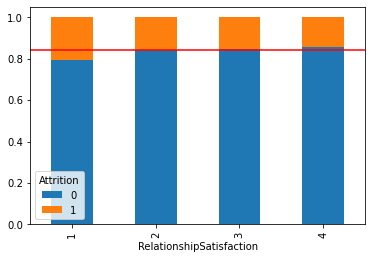

In [66]:
# 1) 집계
tmp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(tmp)
# 2) stacked bar!
tmp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-data[target].mean(), color = 'r')
# plt.text(-0.1,0.51,mobile[target].mean())
plt.show()

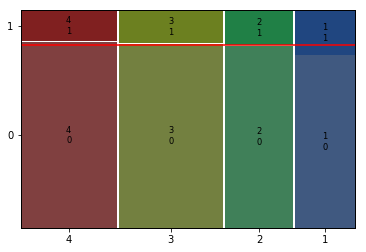

In [67]:

mosaic(data,[feature, target])

# 평균선 추가
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

> * 동료와의 관계에서 부정적인 평가를 한 직원에서의 이직이 가장 많이 일어난다

③ 가설검정(카이제곱검정)

In [68]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 RelationshipSatisfaction    1    2    3    4
Attrition                                   
0                         183  217  337  313
1                          47   41   60   52
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.435126158518535
p-value 0.2181503949975081
기대빈도
 [[193.2  216.72 333.48 306.6 ]
 [ 36.8   41.28  63.52  58.4 ]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * 검정 결과 p-value가 0.22로 유의수준인 0.05보다는 크기 때문에 동료와의 관계는 이직여부에 영향을 미치지 않는다.

#### 3) feature --> target

In [69]:
feature = 'OverTime'

① 교차표(pd.crosstab())

In [70]:
pd.crosstab(data[target], data[feature])

OverTime,No,Yes
Attrition,,
0,803,247
1,93,107


② 시각화( Stacked Bar, Mosaic)

Attrition         0         1
OverTime                     
No         0.896205  0.103795
Yes        0.697740  0.302260


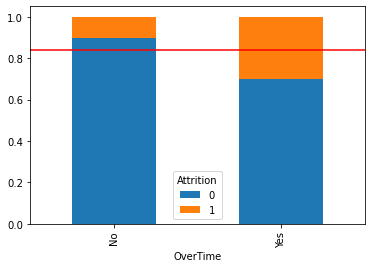

In [71]:
# 1) 집계
tmp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(tmp)
# 2) stacked bar!
tmp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-data[target].mean(), color = 'r')
# plt.text(-0.1,0.51,mobile[target].mean())
plt.show()

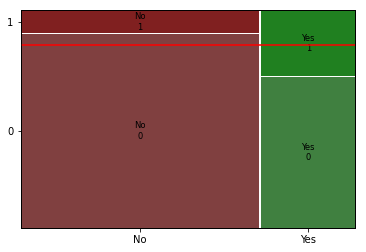

In [72]:

mosaic(data,[feature, target])

# 평균선 추가
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

> * 야근을 하는 직원들이 하지 않는 직원들에 비해 이직이 많이 일어난다.

③ 가설검정(카이제곱검정)

In [73]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 OverTime    No  Yes
Attrition          
0          803  247
1           93  107
----------------------------------------------------------------------------------------------------
카이제곱통계량 72.89605419432075
p-value 1.366611233098835e-17
기대빈도
 [[752.64 297.36]
 [143.36  56.64]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * 검정결과 p-value가 충분히 작기 때문에 야근여부는 이직여부에 강한 영향을 미칠 수 있다.

#### 4) 추가 feature --> target

In [74]:
feature = 'WorkLifeBalance'

① 교차표(pd.crosstab())

In [75]:
pd.crosstab(data[target], data[feature])

WorkLifeBalance,1,2,3,4
Attrition,,,,
0,49,251,639,111
1,20,46,108,26


② 시각화( Stacked Bar, Mosaic)

Attrition               0         1
WorkLifeBalance                    
1                0.710145  0.289855
2                0.845118  0.154882
3                0.855422  0.144578
4                0.810219  0.189781


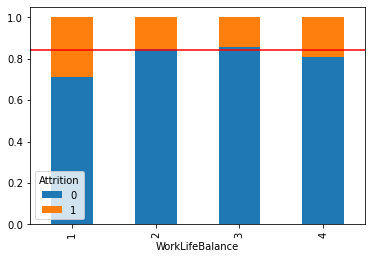

In [76]:
# 1) 집계
tmp = pd.crosstab(data[feature], data[target], normalize = 'index')
print(tmp)
# 2) stacked bar!
tmp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-data[target].mean(), color = 'r')
# plt.text(-0.1,0.51,mobile[target].mean())
plt.show()

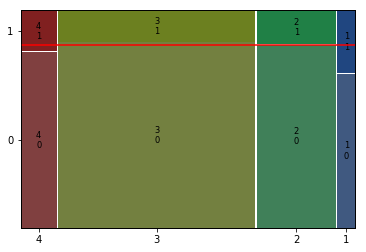

In [77]:

mosaic(data,[feature, target])

# 평균선 추가
plt.axhline(1- data[target].mean(), color = 'r')
plt.show()

> * 워라밸에 부정적인 평가를 한 직원들의 이직률이 다른 요소들에 비해 높게 나왔다.

③ 가설검정(카이제곱검정)

In [78]:
table = pd.crosstab(data[target], data[feature])
print('교차표\n', table)
print('-' * 100)

result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 WorkLifeBalance   1    2    3    4
Attrition                         
0                49  251  639  111
1                20   46  108   26
----------------------------------------------------------------------------------------------------
카이제곱통계량 10.940810822342662
p-value 0.012050277390233672
기대빈도
 [[ 57.96 249.48 627.48 115.08]
 [ 11.04  47.52 119.52  21.92]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> * 검정결과 p-value 값이 0.012로 유의수준인 0.05보다 작기 때문에 워라밸은 이직여부에 약한 영향을 미칠 수 있다.

### (2) 숫자형 Feature --> target

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) feature --> target

In [79]:
# 숫자형 데이터
feature = 'DistanceFromHome'

① 그래프 : histogram, densityplot

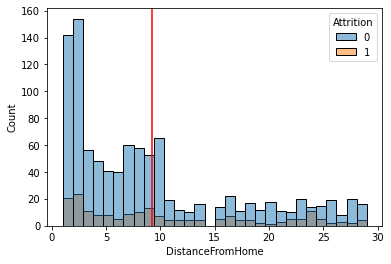

In [80]:
# histogram 시각화 분석
sns.histplot(x = feature, data = data, bins = 30, hue = target) # hue : target 별로 나눠서 그리기
plt.axvline(data[feature].mean(), color='r')
plt.show()

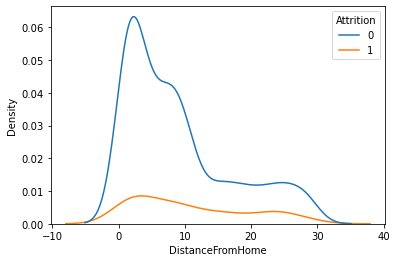

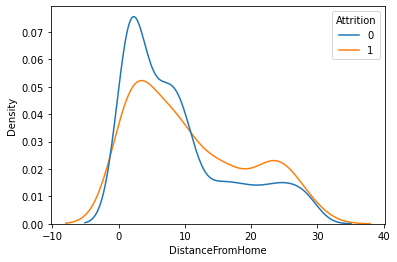

In [81]:
sns.kdeplot(x = feature, data = data, hue = target, common_norm = True)
plt.show()
# densityplot 시각화 분석 common_norm = False -> 두 그래프 각각 아래 면적의 합이 1 
sns.kdeplot(x = feature, data = data, hue = target, common_norm = False)
plt.show()

> * 전체적으로 이직하지 않은 직원들의 수가 이직한 직원들의 수 보다 많은 부분을 차지하지만 밀도 그래프에서 정규화를 하면 10 마일 보다 먼 지역에 거주하는 직원들의 이직 비율이 더 큰 부분을 차지하고 있다.

② 수치화 : 로지스틱회귀

In [82]:
model = data.loc[data[feature].notnull()]
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(model[target], model[feature])
result = model.fit()
print('-'*30)
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.568793
         Iterations 6
------------------------------
DistanceFromHome    2.694280e-44
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * p-value 가 유의수준 0.05보다 작으므로 직장-집의 거리가 이직에 미치는 영향이 유의미하다고 볼 수 있다.

#### 2) feature --> target

In [83]:
# 숫자형 데이터
feature = 'NumCompaniesWorked'

① 그래프 : histogram, densityplot

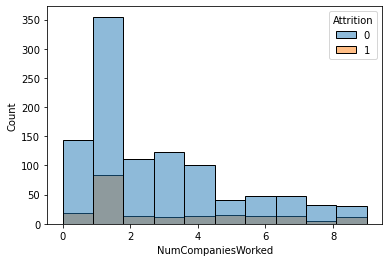

In [84]:
# histogram 시각화 분석
sns.histplot(x = feature, data = data, bins = 10, hue = target) # hue : target 별로 나눠서 그리기
plt.show()

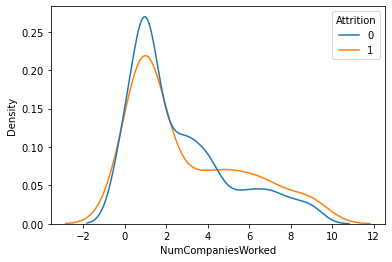

In [85]:
# densityplot 시각화 분석 common_norm = False -> 두 그래프 각각 아래 면적의 합이 1 
sns.kdeplot(x = feature, data = data, hue = target, common_norm = False)
plt.show()

> * 전체적으로 이직하지 않은 직원들의 수가 이직한 직원들의 수 보다 많은 부분을 
차지하지만 밀도 그래프에서 입사 전 근무한 회사 수가 4개 이상의 직원들의 이직 비율이 더 큰 부분을 차지하고 있다.

② 수치화 : 로지스틱회귀

In [86]:
model = data.loc[data[feature].notnull()]
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(model[target], model[feature])
result = model.fit()
print('-'*30)
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.564716
         Iterations 6
------------------------------
NumCompaniesWorked    2.545612e-45
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * p-value 가 유의수준 0.05보다 작으므로 입사 전 근무한 회사 수가 이직에 미치는 영향이 유의미하다고 볼 수 있다.

#### 3) feature --> target

In [87]:
# 숫자형 데이터
feature = 'TotalWorkingYears'

① 그래프 : histogram, densityplot

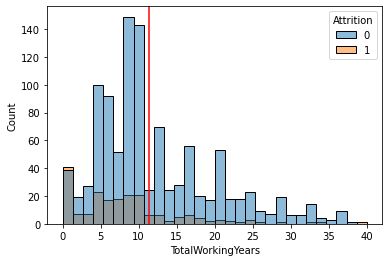

In [88]:
# histogram 시각화 분석
sns.histplot(x = feature, data = data, bins = 30, hue = target) # hue : target 별로 나눠서 그리기
plt.axvline(data[feature].mean(), color='r')
plt.show()

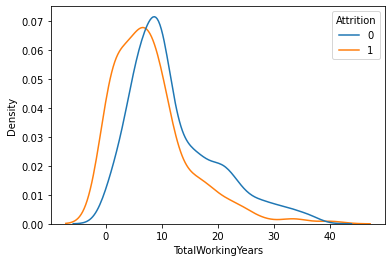

In [89]:
# densityplot 시각화 분석 common_norm = False -> 두 그래프 각각 아래 면적의 합이 1 
sns.kdeplot(x = feature, data = data, hue = target, common_norm = False)
plt.show()

> * 총 경력 연수가 0인, 즉 신입사원들의 경우에는 경력이 있는 직원들의 비해 이직할 확률이 높은 것으로 볼 수 있다.
> * 신입사원들의 이직 이유에 대해 조사해 볼 필요가 있다.

② 수치화 : 로지스틱회귀

In [90]:
model = data.loc[data[feature].notnull()]
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(model[target], model[feature])
result = model.fit()
print('-'*30)
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.432906
         Iterations 6
------------------------------
TotalWorkingYears    1.867338e-74
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * p-value 가 유의수준 0.05보다 작으므로 입사 전 근무한 회사 수가 이직에 미치는 영향이 유의미하다고 볼 수 있다.
> * 총 경력 연수가 0인 신입사원들의 이직은 분위기, 직무, 환경 등 다양한 이유로 인해 적응하지 못한 결과로 예측된다.
> * 입사 후 1년 정도의 기간을 적응하게 되면 이직하지 않을 확률이 충분히 높다고 판단할 수 있다.

#### 4)  feature --> target

In [91]:
# 숫자형 데이터
feature = 'PercentSalaryHike'

① 그래프 : histogram, densityplot

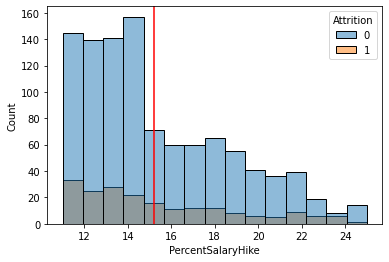

In [92]:
# histogram 시각화 분석
sns.histplot(x = feature, data = data, bins = 15, hue = target) # hue : target 별로 나눠서 그리기
plt.axvline(data[feature].mean(), color='r')
plt.show()

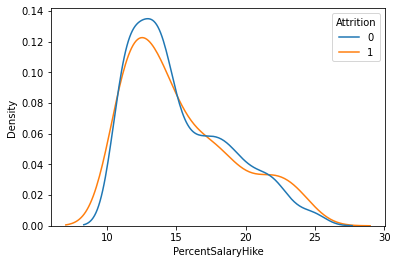

In [93]:
# densityplot 시각화 분석 common_norm = False -> 두 그래프 각각 아래 면적의 합이 1 
sns.kdeplot(x = feature, data = data, hue = target, common_norm = False)
plt.show()

> * 15% 이후로 이직율의 cross 되는 점을 여러번 볼 수 있다.
> * 22% 이후에는 급여인상율이 높음에도 불구하고 이직하는 비율이 더 크다

② 수치화 : 로지스틱회귀

In [94]:
model = data.loc[data[feature].notnull()]
# 로지스틱 모형을 만들고 통계량을 구해 봅시다.
model = sm.Logit(model[target], model[feature])
result = model.fit()
print('-'*30)
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.450230
         Iterations 5
------------------------------
PercentSalaryHike    3.979995e-95
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> * 검정결과 p-value가 충분히 작으므로 전년대비 급여인상율은 이직여부에 큰 영향을 미칠 수 있다.


## 4.관계 정리

### 1) 강한관계의 변수

> * DistanceFromHome (집-직장 거리)
> * NumCompaniesWorked (입사 전 근무한 회사 수)
> * OverTime (야근여부)
> * PercentSalaryHike (전년대비 급여인상율)

### 2) 약한관계의 변수

> * JobSatisfaction (직무 만족도)
> * WorkLifeBalance (워라밸. 일-삶 균형도)

### 3) 관계 없음

> * RelationshipSatisfaction (동료와의 관계)